In [2]:
import pandas as pd
movies = pd.read_csv("https://raw.githubusercontent.com/BiaChacon/data-science-starting/master/datasets/ml-latest-small/movies.csv")
ratings = pd.read_csv("https://raw.githubusercontent.com/BiaChacon/data-science-starting/master/datasets/ml-latest-small/ratings.csv")
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Desafio 1
Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.


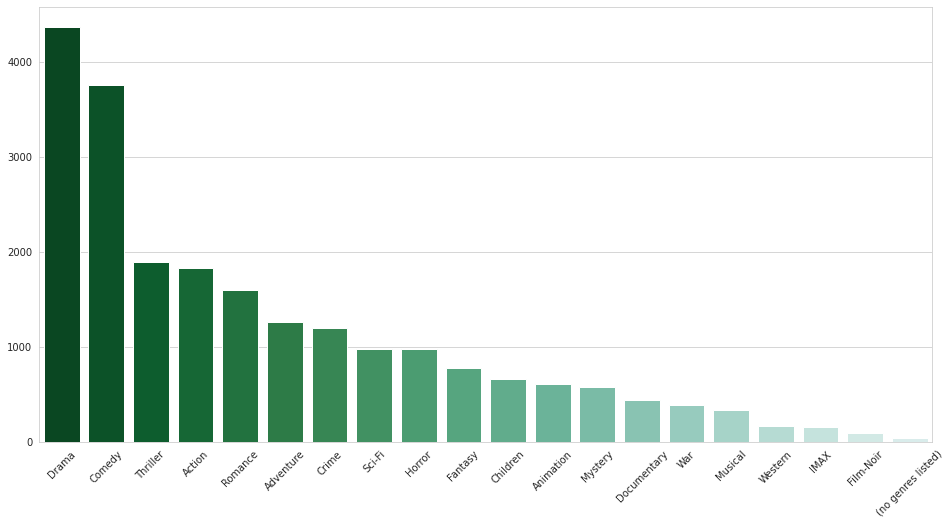

In [3]:
sns.set_style("whitegrid")

movies_genre = movies["genres"].str.get_dummies('|').sum().sort_values(ascending=False)

plt.figure(figsize=(16,8))

sns.barplot(x=movies_genre.index,
            y=movies_genre.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(movies_genre) + 4))

plt.xticks(rotation=45)

plt.show()

# Desafio 2
Encontar vários filmes com médias próximas e distribuições diferentes, use a função **plot_movies(n)** para plotar.


In [0]:
def plot_movie(n):
  plt.figure(figsize=(20,10))
  movies_rating = ratings.query(f"movieId=={n}")["rating"]
  plt.subplot(1,2,1)
  movies_rating.plot(kind='hist')
  plt.subplot(1,2,2)
  movies_rating = ratings.query(f"movieId=={n}")["rating"]
  movies_rating.plot.box()
  plt.show()
  movies_genre.describe()

In [0]:
def plot_box_movie(a,b,c,d,e,f,g,h,i,j):
  plt.figure(figsize=(20,10))
  sns.boxplot(data = ratings.query(f"movieId in [{a},{b},{c},{d},{e},{f},{g},{h},{i},{f}]"), 
              x ="movieId", 
              y="rating")
  movies_genre.describe()

In [6]:
movie_rating_mean = ratings.groupby("movieId")["rating"].mean()

movies_ratings = movies.join(movie_rating_mean, on='movieId')
movies_ratings = movies_ratings.rename(columns={'rating': 'mean_rating'})

#lista de filmes com médias de avaliação proximas
movies_ratings.query("mean_rating<4").sort_values("mean_rating", ascending=False).head(10)

,movieId,title,genres,mean_rating
907,1206,"Clockwork Orange, A (1971)",Crime|Drama|Sci-Fi|Thriller,3.995833
7768,91529,"Dark Knight Rises, The (2012)",Action|Adventure|Crime|IMAX,3.993421
8376,109487,Interstellar (2014),Sci-Fi|IMAX,3.993151
977,1278,Young Frankenstein (1974),Comedy|Fantasy,3.992754
398,457,"Fugitive, The (1993)",Thriller,3.992105
1074,1394,Raising Arizona (1987),Comedy,3.991379
7465,81834,Harry Potter and the Deathly Hallows: Part 1 (...,Action|Adventure|Fantasy|IMAX,3.989362
6797,60684,Watchmen (2009),Action|Drama|Mystery|Sci-Fi|Thriller|IMAX,3.988372
5366,8950,The Machinist (2004),Drama|Mystery|Thriller,3.986842
8636,119145,Kingsman: The Secret Service (2015),Action|Adventure|Comedy|Crime,3.986111


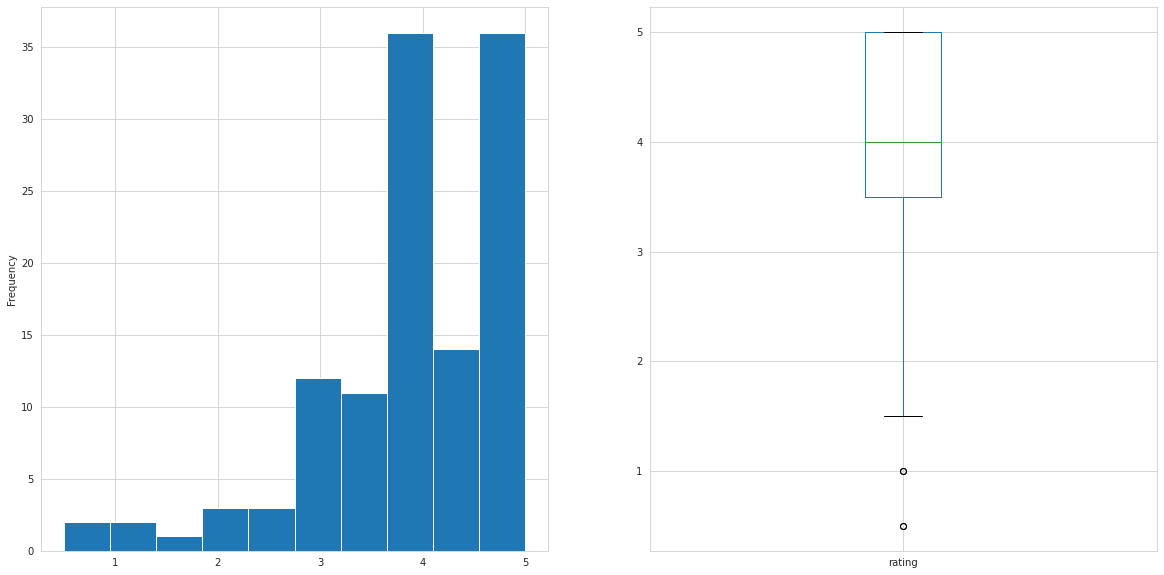

In [7]:
plot_movie(1206)

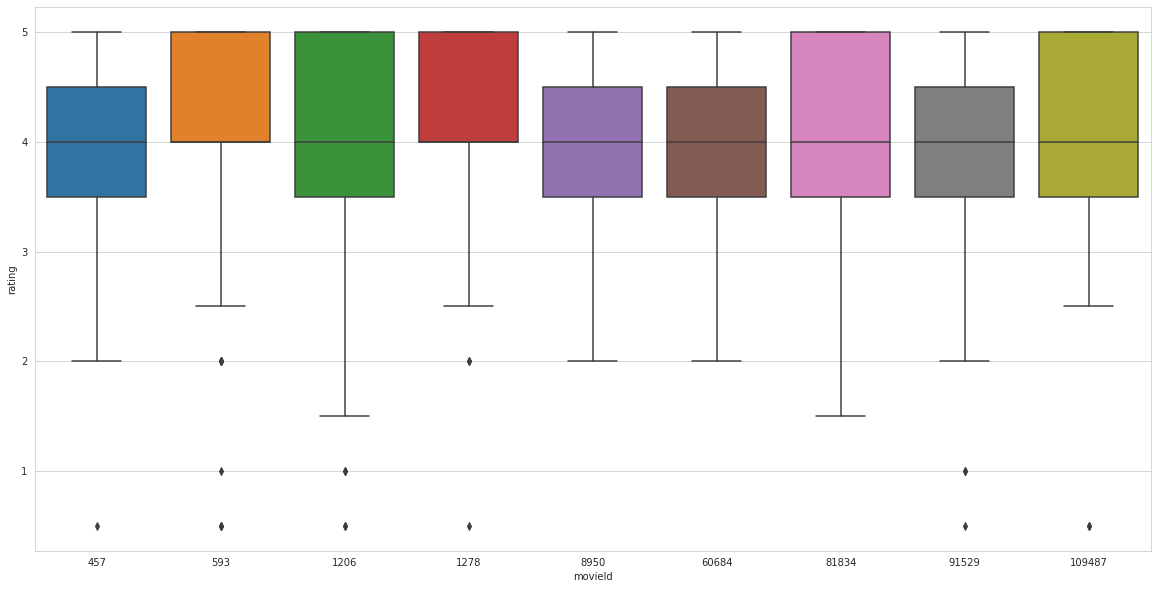

In [8]:
#plotbox de filmes com médias de avaliação proximas
plot_box_movie(1206,91529,109487,1278,457,593,81834,60684,8950,119145)

# Desafio 3
Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.


In [9]:
num_ratings = ratings.groupby('movieId').size()
num_ratings.name = 'ratings_number'

movies_mean = movies.join(num_ratings,on='movieId')
movies_mean.sort_values("ratings_number", ascending=False).head(10)

,movieId,title,genres,ratings_number
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0
97,110,Braveheart (1995),Action|Drama|War,237.0
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0
461,527,Schindler's List (1993),Drama|War,220.0


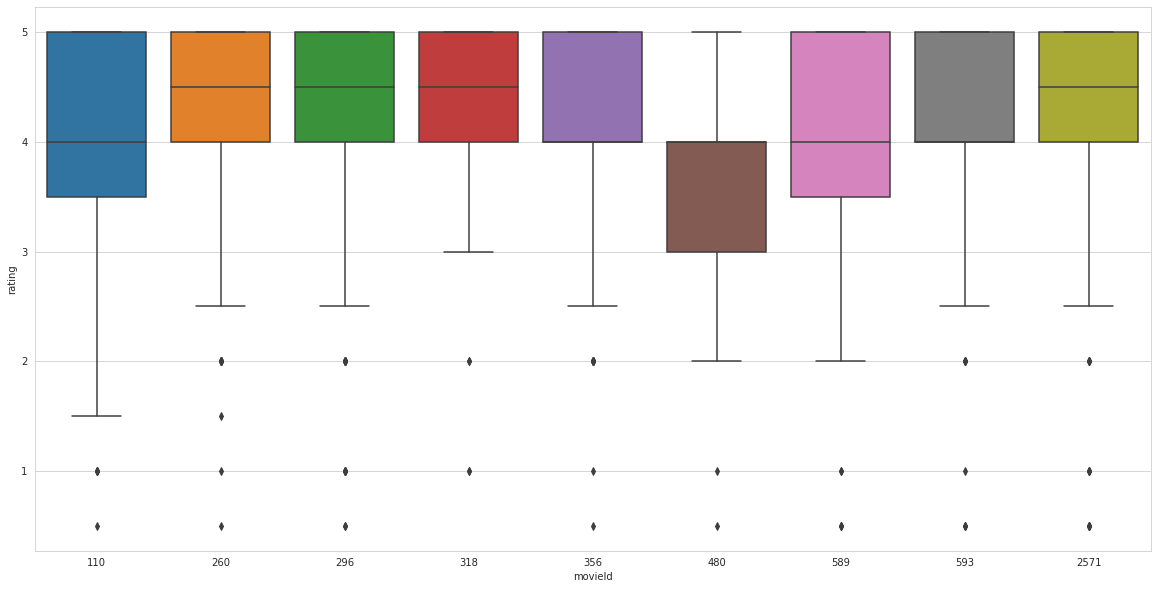

In [10]:
plot_box_movie(356,318,296,593,2571,260,480,110,589,527)

# Desafio 4
Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

(0    Toy Story (1995)
Name: title, dtype: object, 1    Jumanji (1995)
Name: title, dtype: object, 701    Wizard of Oz, The (1939)
Name: title, dtype: object, 6242    Little Miss Sunshine (2006)
Name: title, dtype: object)


[Text(0, 0, 'Toy Story'),
 Text(0, 0, 'Jumanji'),
 Text(0, 0, 'The Wizard of Oz'),
 Text(0, 0, 'Little Miss Sunshine')]

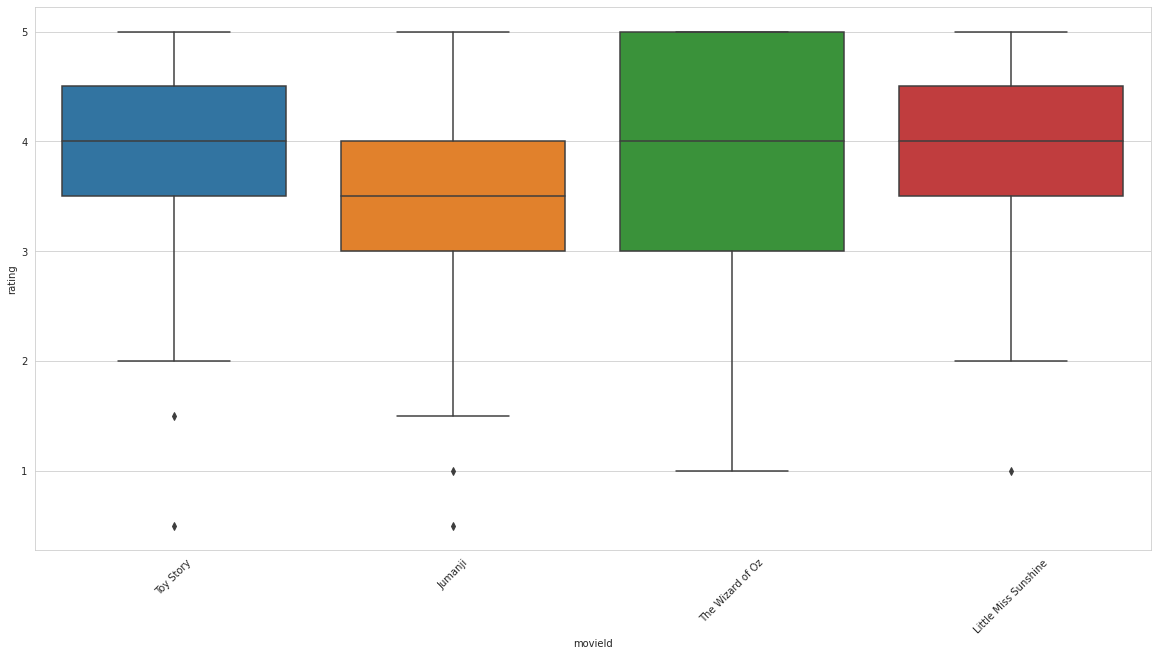

In [11]:
def get_title(n):
  movie = movies.query(f"movieId=={n}")
  t = movie.title
  return t

plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
box=sns.boxplot(data = ratings.query("movieId in [1,2,919,46578]"), 
              x ="movieId", 
              y="rating")

titles = get_title(1), get_title(2), get_title(919), get_title(46578)
print(titles)

box.set_xticklabels(['Toy Story', 'Jumanji', 'The Wizard of Oz', 'Little Miss Sunshine'])

# Desafio 5
Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [12]:
mm = movies.join(ratings.groupby("movieId")["rating"].mean(), on="movieId")

mm = mm.rename(columns={"rating": "rating_mean"})
filmes_com_votos = mm.join(ratings.groupby('movieId').size().rename("total"), on="movieId")

rating_mode = ratings.groupby("movieId")["rating"].agg(pd.Series.mode).rename("rating_mode")
rating_median = ratings.groupby("movieId")["rating"].median().rename("rating_median")

desc = filmes_com_votos.join(rating_mode, on="movieId")
desc = desc.join(rating_median, on="movieId")
desc.drop(['genres'], axis=1, inplace=True)
desc.head()

,movieId,title,rating_mean,total,rating_mode,rating_median
0,1,Toy Story (1995),3.920930,215.0,4,4.0
1,2,Jumanji (1995),3.431818,110.0,4,3.5
2,3,Grumpier Old Men (1995),3.259615,52.0,3,3.0
3,4,Waiting to Exhale (1995),2.357143,7.0,3,3.0
4,5,Father of the Bride Part II (1995),3.071429,49.0,3,3.0


In [13]:

desc[desc.rating_mean.between(left=2.75, right=3.25)].head()

,movieId,title,rating_mean,total,rating_mode,rating_median
4,5,Father of the Bride Part II (1995),3.071429,49.0,3,3.0
6,7,Sabrina (1995),3.185185,54.0,3,3.0
7,8,Tom and Huck (1995),2.875000,8.0,3,3.0
8,9,Sudden Death (1995),3.125000,16.0,3,3.0
12,13,Balto (1995),3.125000,8.0,3,3.0


In [14]:
desc[desc.rating_mean.between(left=0.25, right=0.75)].head()

,movieId,title,rating_mean,total,rating_mode,rating_median
1017,1328,"Amityville Curse, The (1990)",0.75,2.0,"[0.5, 1.0]",0.75
2689,3604,Gypsy (1962),0.50,1.0,0.5,0.50
2825,3774,House Party 2 (1991),0.75,4.0,"[0.5, 1.0]",0.75
2933,3933,"Killer Shrews, The (1959)",0.50,1.0,0.5,0.50
3027,4051,Horrors of Spider Island (Ein Toter Hing im Ne...,0.50,1.0,0.5,0.50


In [15]:
desc[desc.rating_mean.between(left=4.75, right=5)].head()

,movieId,title,rating_mean,total,rating_mode,rating_median
48,53,Lamerica (1994),5.0,2.0,5,5.0
87,99,Heidi Fleiss: Hollywood Madam (1995),5.0,2.0,5,5.0
121,148,"Awfully Big Adventure, An (1995)",5.0,1.0,5,5.0
405,467,Live Nude Girls (1995),5.0,1.0,5,5.0
432,495,In the Realm of the Senses (Ai no corrida) (1976),5.0,1.0,5,5.0


# Desafio 6
Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

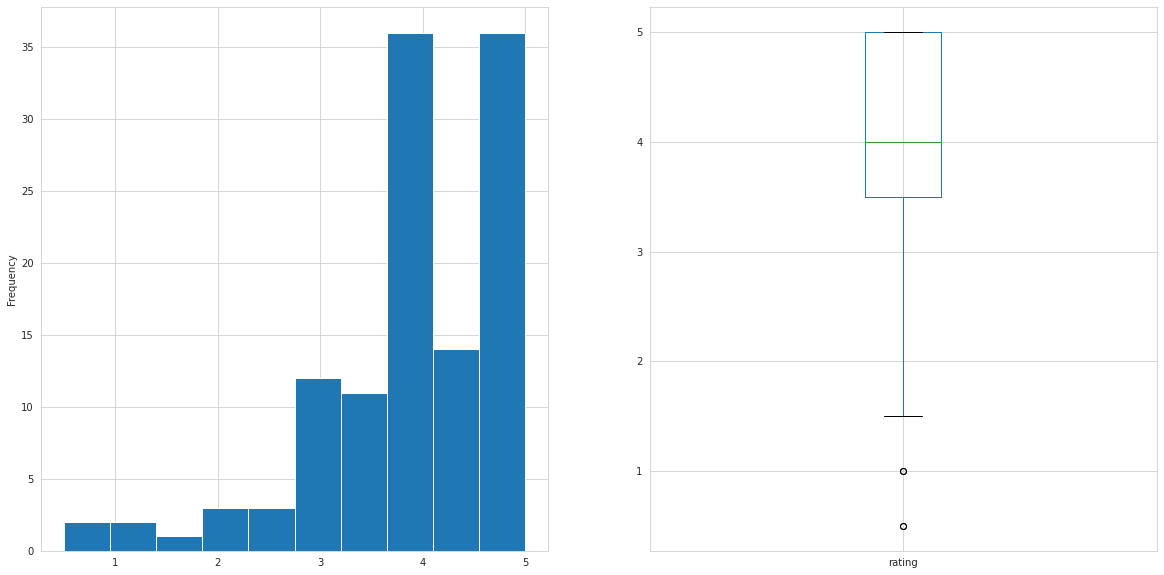

In [16]:
plot_movie(1206)

# Desafio 7
Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).


In [17]:
years = mm.title.str.extract(r'(\([\d]{4}\))')
years.columns = ['year']
movies_years = mm.join(years)
years = years.join(mm["movieId"])
years.head()

mm.head()

,movieId,title,genres,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


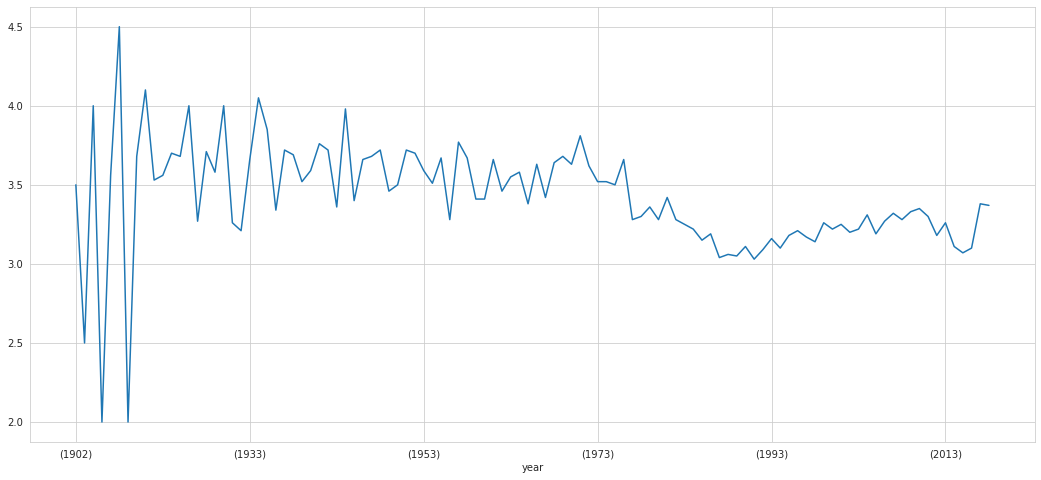

In [18]:
year_mean = movies_years.groupby("year")["rating_mean"].mean().round(2)
plt.figure(figsize=(18, 8))
year_mean.plot()